In [1]:
import math


import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Условие задачи

Подкинули монету N раз. Кол-во случаев, когда выпал орёл, на 10% больше, чем кол-во случаев, когда выпала решка. При каком N мы можем сказать, что монета «нечестная» (орёл и решка выпадают с разной вероятностью)?
Важен не только ответ, но и решение.


#### Рассуждения:

Данный тип задачи по момему мнению относится к проверке гипотезы о распределении номинативной переменной.

А именно(переформулирую вопрос):

    Утверждается, что(основная гипотеза) монетка является правильной. При каком кол-ве бросков данная разница в процентном
    соотношении выпавших орлов и решек существенна т.е. мы уже не может утверждать, что монетка является чесной и
    соответственно основная гипотеза отклоняется, а принимается альтернативная гипотеза о том, что
    монетка не является чесной.

Пояснение:

    p_орла - вероятность выпадения орла
    р_решки - вероятность выпадения решки
    Монетка правильная -> p_орла = p_решки = 0.5
    Монетка неправильная -> p_орла != p_решки

Составим таблицу предполагаемого распределения и наблюдаемого:
    
    N - кол-во проведённых экспериментов(бросков)
    
    |                           | Орёл  | Решка |
    | ------------------------- | ----- | ----- |
    | Наблюдаемое распределение | 0.55N | 0.45N |
    | ------------------------- | ----- | ----- |
    | Ожидаемое распределение   | 0.5N  | 0.5N  |

Для решения данной задачи подсчитывается такая стастика, как расстояние Пирсона:
     
     chi_square = (0.55N - 0.5N)^2/(0.5N) + (0.45N - 0.5N)^2 / (0.5N) = 0.01N 
        

Посмотрим на распределение данной статистики(распределение Пирсона):

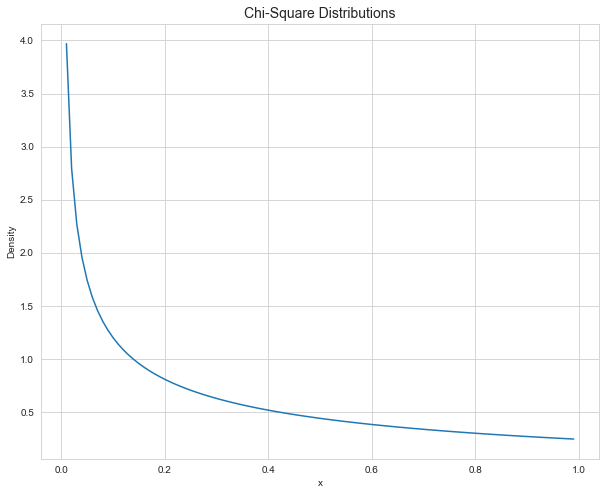

In [62]:
from scipy.stats import chi2

x = np.arange(0, 1, 0.01)

plt.figure(figsize=(10, 8))
plt.plot(x, chi2.pdf(x, df=1))
plt.ylabel('Density')
plt.xlabel('x')
plt.title('Chi-Square Distributions', fontsize=14)
plt.grid(True)

Для проверки(хотя в данном случае нас больше интересует отклонение) основной гипотезы, выберем уровень доверия(уверенности),
как правило это 95%.

В данной задаче рассмотрим набор различныз уровней доверия: 99% - 90%.

In [50]:
thresholds = []
confidence_list = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

In [51]:
for confidence in confidence_list:
    threshold = 100 * chi2.ppf(confidence, df=1)
    thresholds.append(math.ceil(threshold))

In [52]:
thresholds

[271, 288, 307, 329, 354, 385, 422, 471, 542, 664]

отобразим зависимость минимального количества бросков(N) для различных уровней доверия(уверенности), при которых основную гипотезу о чесности монетки можно отклонить 

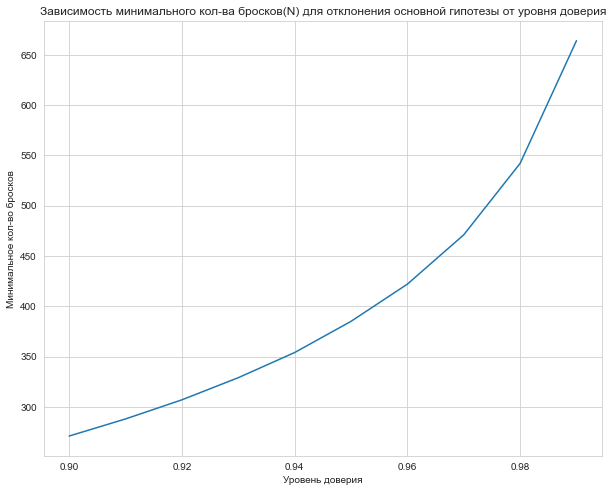

In [64]:
plt.figure(figsize=(10, 8))
plt.plot(confidence_list, thresholds)
plt.xlabel("Уровень доверия")
plt.ylabel("Минимальное кол-во бросков")
plt.title("Зависимость минимального кол-ва бросков(N) для отклонения основной гипотезы от уровня доверия")
plt.grid(True)

Таким образом в качестве ответа рассмотрим пример для уровня доверия(95%):

Чтобы утверждать, что монетка неправильная(т.е. отклонить основную гипотезу при уровне доверия 95%), при данной разнице
в процентном соотношении необходимо, чтобы кол-во бросков было не менее 385.